In [1]:
#TEST
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import sys
from tabulate import tabulate
import numpy as np
  
# setting path
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import MY_homophilic_ba_graph, create_graph
#from people.people_recommender import people_recommender

[-0.2190201341508653, -0.8058737430021174, -0.8675765379792215, 0.6614796584165499, -0.8780605130173089, 0.8066649691382581, 0.2986687322756867, 0.7125462194141161, 0.37934168627198916, 0.49688604626720867, -0.903037344255273, 0.5609223101725431, 0.10810829731402682, 0.16490040203417156, 0.48989008155679215, -0.8919298228344286, -0.6614913423973403, -0.9095761335747123, 0.12315201473323256, -0.8059014090397416]


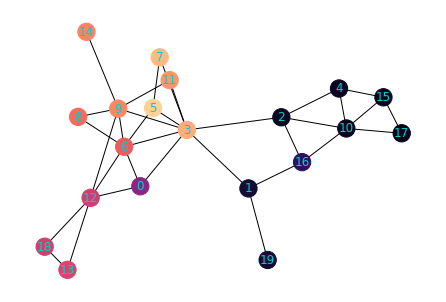

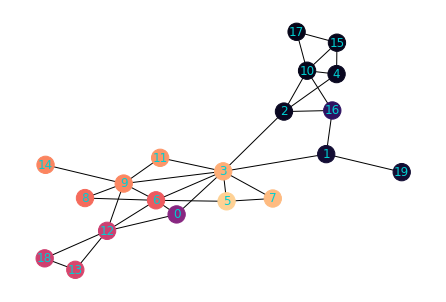

In [3]:
#TEST
G = create_graph(20, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
colors = list(nx.get_node_attributes(G, 'opinion').values())
print(colors)
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
#G = people_recommender(G, [18], 'topology_based')

colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

In [ ]:
#TEST
# Calls MY_homophilic_ba_graph
G = MY_homophilic_ba_graph(10, 9, 0, 0)
  
# Remapping opinions from [0, 100] to [-1, 1]
opinions = nx.get_node_attributes(G, 'opinion')
for curr_op in opinions:
    opinions[curr_op] = (opinions[curr_op] - 50) / 50

# Setting opinions as node attributes  
nx.set_node_attributes(G, opinions, 'opinion')
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

In [ ]:
#TEST
import numpy as np
arr = [2,7,8]
prova = np.random.choice(arr, size=1, replace=False)
print(prova[0])

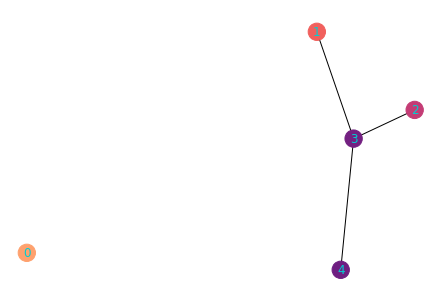

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 3. 0.]
 [0. 3. 3. 0. 3.]
 [0. 0. 0. 3. 0.]]
[[0. 0. 0. 0. 0.]]
[0, 0, 0, 0, 0]
[]


In [4]:
G = create_graph(5, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
matrice = nx.to_numpy_matrix(G)
print(matrice)
prova = np.linalg.matrix_power(matrice, 3)
print(prova)
print(prova[0])
prova1 = list(map(int, np.ravel(prova[0])))
print(prova1)
print([x for x in prova1 if x > 0 and x > 1])

In [ ]:
target = [1, 5, 0, 3, 6, 40, 0, 70]
indici_validi = [0, 2, 3, 5, 6, 7]
three_hop_not_friends = [ind for ind, x in enumerate(target) if x > 0 and ind in indici_validi]
print(three_hop_not_friends)

In [ ]:
import pandas as pd
df2 = pd.DataFrame(data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index=[4, 5, 6], columns=['a', 'b', 'c'])
print(df2)

d = pd.DataFrame(0, index=np.arange(len(data)), columns=feature_list)

In [13]:
G = nx.star_graph(6)
#opinions_list = [-1] * 7
#opinions = dict(zip(G.nodes(), opinions_list))
nx.set_node_attributes(G, {0: 1, 1: 1, 2: 1, 3: 1, 4: -1, 5: -1, 6: 0, 7: 0}, 'opinion')
#nx.set_node_attributes(G, {0: [1,2]}, 'people_recommended')
prova = nx.get_node_attributes(G, 'opinion')
print(prova)
G.nodes[0]['opinion'] = 34
del G.nodes[0]['opinion']
print(G.nodes(data=True))
print(nx.get_node_attributes(G, 'opinion'))
nx.set_node_attributes(G, {1: 2, 6: 8}, 'opinion')
print(nx.get_node_attributes(G, 'opinion'))

{0: 1, 1: 1, 2: 1, 3: 1, 4: -1, 5: -1, 6: 0}
[(0, {}), (1, {'opinion': 1}), (2, {'opinion': 1}), (3, {'opinion': 1}), (4, {'opinion': -1}), (5, {'opinion': -1}), (6, {'opinion': 0})]
{1: 1, 2: 1, 3: 1, 4: -1, 5: -1, 6: 0}
{1: 2, 2: 1, 3: 1, 4: -1, 5: -1, 6: 8}


In [8]:
import copy
G = nx.star_graph(6)
nx.set_node_attributes(G, {0: 1, 1: 1, 2: 1, 3: 1, 4: -1, 5: -1, 6: 0, 7: 0}, 'opinion')
lista = []
lista.append(G)
G2 = copy.deepcopy(lista[0])
nx.set_node_attributes(G2, {0: 1, 1: 1}, 'attributo')
print(G.nodes(data=True))
print(G2.nodes(data=True))
print(type(G))

[(0, {'opinion': 1, 'attributo': 1}), (1, {'opinion': 1, 'attributo': 1}), (2, {'opinion': 1}), (3, {'opinion': 1}), (4, {'opinion': -1}), (5, {'opinion': -1}), (6, {'opinion': 0})]
[(0, {'opinion': 1, 'attributo': 1}), (1, {'opinion': 1, 'attributo': 1}), (2, {'opinion': 1}), (3, {'opinion': 1}), (4, {'opinion': -1}), (5, {'opinion': -1}), (6, {'opinion': 0})]
<class 'networkx.classes.graph.Graph'>


In [15]:
lista3 = [{"index":0, "nome":"pippo"},{"index":2, "nome":"pluto"}]
lista4 = ["qui", "quo", "qua"]
lista_finale = [[el, copy.deepcopy(lista4[el["index"]])] for el in lista3]
print(lista_finale)

[[{'index': 0, 'nome': 'pippo'}, 'qui'], [{'index': 2, 'nome': 'pluto'}, 'qua']]


In [ ]:
import recmetrics
d = {'col0': [0, 1, 1], 'col1': [0, 0, 0], 'col2': [1, 0, 0]}
df = pd.DataFrame(data=d, index = [2, 3, 7])
print(df)
dati = [2,3,7]
print(recmetrics.intra_list_similarity([dati], df))

In [20]:
from scipy import special
prova = special.softmax(np.array([2/(np.finfo(np.float64).tiny + np.finfo(np.float64).tiny), 2/(np.finfo(np.float64).tiny + np.finfo(np.float64).tiny), 1/(np.finfo(np.float64).tiny + np.finfo(np.float64).tiny)]))
print(prova)
print(2/np.finfo(np.float64).tiny+np.finfo(np.float64).tiny)
print(3/np.finfo(np.float64).tiny)
prova2 = special.softmax([3/0.000000001, 3/0.000000001, 1/0.000000001])
print(prova2)
print("##########")
prova3 = special.softmax([0.5, 1, 2])
print(prova3)
prova4 = special.softmax([-0.5, -1, -2])
print(prova4)
prova5 = special.softmax([2-0.5, 2-1, 2-2])
print(prova5)
prova6 = special.softmax([1.5, 1, 0])
print(prova6)

[1. 1. 0.]
8.98846567431158e+307
1.348269851146737e+308
[0.5 0.5 0. ]
##########
[0.14024438 0.2312239  0.62853172]
[0.54654939 0.33149896 0.12195165]
[0.54654939 0.33149896 0.12195165]
[0.54654939 0.33149896 0.12195165]


In [13]:
class SimulateEpochPeopleRecommenderError(Exception):
    """Raised when an error occurred in the simulate_epoch_people_recommender method"""
    pass

i = 2
if i == 2:
    raise SimulateEpochPeopleRecommenderError
else:
    print("prova")

SimulateEpochPeopleRecommenderError: 

In [19]:
prova = np.random.poisson(0.5, 20)
print(prova)

[0 0 0 0 2 1 0 0 0 0 1 0 0 0 2 0 1 0 1 0]


[-0.2915984708042174, -0.6265024705354179, -0.364019180034139, 0.04670890240307468, -0.49068158233303416, 0.7923608729349656, 0.7032887013322906, 0.6443347069372851, -0.6415455067925051, 0.48302505614769764, 0.7787146928938966, -0.008451547311784768, -0.7155866647910547, 0.5394297933413861, 0.2188042779798729, 0.5489658819847447, 0.013225234403470454, -0.46630422507895375, -0.6072645812827304, -0.6578364471155946]


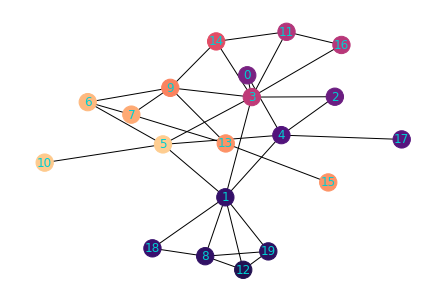

[0, 3, 4, 1, 2, 5, 9, 11, 14, 16, 17, 8, 12, 18, 19, 6, 10, 7, 13, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [4]:
G = create_graph(20, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
colors = list(nx.get_node_attributes(G, 'opinion').values())
print(colors)
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

print(list(nx.shortest_path(G, source=0)))
print(G.nodes)

In [12]:
l1 = [1,2,3]
l2 = [1,2,3,4,5]
remaining_nodes = set(l2) - set(list(l1))
print(list(remaining_nodes))
c = 5
for index in range(1):
    print("Sommo")


[4, 5]
Sommo


In [19]:
from scipy import special
d1 = {0: 2, 1: 6, 2: 8}
overlapping_distribution = special.softmax(list(d1.values()))
print(overlapping_distribution)
d2 = dict(zip(d1.keys(), overlapping_distribution))
print(d2)
recommended_friend = np.random.choice(list(d2.keys()), size=1, replace=False, p=list(d2.values()))
print(recommended_friend)

[0.00217852 0.11894324 0.87887824]
{0: 0.0021785213571970225, 1: 0.11894323591065203, 2: 0.8788782427321505}
[2]


In [23]:
G = create_graph(20, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
neigs = []
neigs_popular = [neig for neig in neigs if len(list(nx.neighbors(G, neig))) > 1]
print(neigs_popular)

[]


In [24]:
distances_distribution = special.softmax([])
print(distances_distribution)

ValueError: zero-size array to reduction operation maximum which has no identity

In [29]:
desf = None
if False:
    prova = "pippo"
    desf = "fdedas"
print(desf)

None


In [2]:
import itertools
list2d = [[1,2,3], [4,5,6], [7], [8,9]]
merged = list(itertools.chain.from_iterable(list2d))
print(merged)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


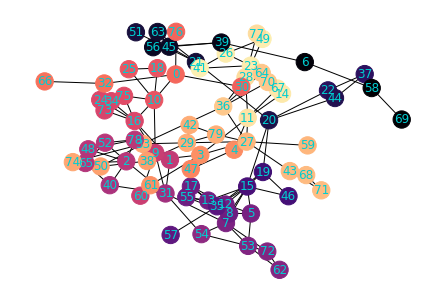

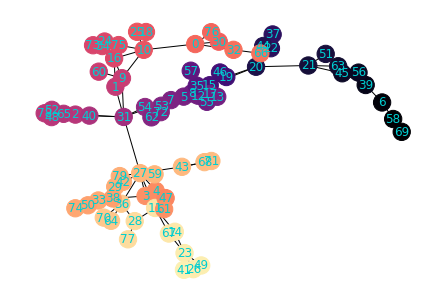

In [445]:
import copy
G = create_graph(80, [1], avg_friend = 8, hp_alpha=12, hp_beta=0)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
number_components = nx.number_connected_components(G)
if number_components > 1:
    G_fake = copy.deepcopy(G)
    old_nodes_found = []
    components = nx.connected_components(G)
    for nodes_component in components:
        if old_nodes_found:
            node_source = np.random.choice(old_nodes_found, size=1, replace=False)
            node_target = np.random.choice(list(nodes_component), size=1, replace=False)
            G_fake.add_edge(node_source[0], node_target[0])
        old_nodes_found += list(nodes_component)

    colors = list(nx.get_node_attributes(G_fake, 'opinion').values())
    labels =  nx.get_node_attributes(G_fake, 'opinion')
    #print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
    nx.draw(G_fake, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
    plt.show()

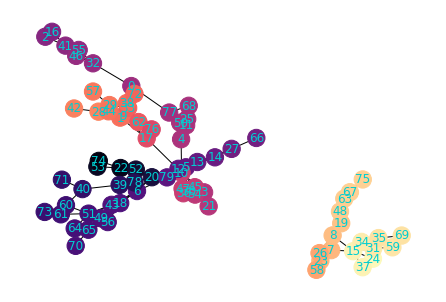

--- 0.0009946823120117188 seconds custom method---
--- 0.0 seconds nx method---


In [418]:
from people.people_recommender import breadth_first_search
import time
G = create_graph(80, [1], avg_friend = 8, hp_alpha=12, hp_beta=0)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
number_components = nx.number_connected_components(G)
if number_components > 1:
    old_nodes_found = []
    nodes_not_found = list(G.nodes)
    # No need to explore the last component. The nodes that have not yet been found are the only ones present in it
    start_time = time.time()
    for _ in range(number_components-1):
        chosen_node = np.random.choice(nodes_not_found, size=1, replace=False) 
        # performs an exploration with BFS Algorithm
        nodes_found = breadth_first_search(G, chosen_node[0])
        old_nodes_found += nodes_found
        nodes_not_found = list(set(nodes_not_found) - set(old_nodes_found))
    print("--- %s seconds custom method---" % (time.time() - start_time))
    start_time2 = time.time()
    prova = nx.connected_components(G)
    print("--- %s seconds nx method---" % (time.time() - start_time2))
    

In [447]:
dict1 = {1: 5, 3: 0, 6: 7}
chiavi1 = dict1.keys()
print(set(chiavi1))

{1, 3, 6}


In [449]:
lista = [3,5,6]
print(str(lista.index(8)))

ValueError: 8 is not in list

In [454]:
lista1 = [3,5,6]
lista2 = []
lista = lista2 if lista2 else lista1
print(len(lista2 if lista2 else lista1))

3


In [6]:
import copy
G = create_graph(80, [1], avg_friend = 8, hp_alpha=12, hp_beta=0)
G_fake = copy.deepcopy(G)
non_edges = list(nx.non_edges(G_fake))

In [10]:
number_edges_to_insert = 1
for _ in range(number_edges_to_insert):
    print('ciao')

ciao


In [3]:
mean = np.mean([])
print(mean)

nan


c:\Users\Hicar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Hicar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
G = nx.star_graph(6)
#opinions_list = [-1] * 7
#opinions = dict(zip(G.nodes(), opinions_list))
nx.set_node_attributes(G, {}, 'opinion')
#nx.set_node_attributes(G, {0: [1,2]}, 'people_recommended')
prova = nx.get_node_attributes(G, 'opinion')
print(prova)

{}


In [11]:
prova_unif_distr = np.random.uniform()
print(prova_unif_distr)
ecco = np.random.choice([1,2,3], size=1, replace=False, p=None)
print(ecco[0])
prova2 = None
print(prova2.values())

0.7544983181914762
2


AttributeError: 'NoneType' object has no attribute 'values'

In [65]:
G = nx.path_graph(4)
nx.add_path(G, [10, 11, 12])
G2 = nx.Graph()
c = nx.connected_components(G)
G2.add_nodes_from(next(c))
G2.add_edges_from(G.edges(G2.nodes))
#print(list(G2.nodes))
#print(G2.edges)
for comp in c:
    print(comp) 
    G2.add_nodes_from(comp)
    G2.add_edges_from(G.edges(comp))
print(G2.nodes)
print(G2.edges)
#print(list(next(c)))
#G2.add_edges_from(G.edges(G2.nodes))
#print(G2.edges)

{10, 11, 12}
[0, 1, 2, 3, 10, 11, 12]
[(0, 1), (1, 2), (2, 3), (10, 11), (11, 12)]


In [60]:
#print(np.random.choice([2,6,9,5], size=2, replace=False))
import random
G = nx.path_graph(4)
nx.add_path(G, [10, 11, 12])
print(list(nx.non_edges(G)))
print(set(np.random.choice(len(list(nx.non_edges(G))), size=2, replace=False)))
#prova = dict(enumerate(nx.non_edges(G)))
#print(prova)
#print(np.array(nx.non_edges(G)))
#print(random.choices(list(nx.non_edges(G)), k=2))

#print(np.random.choice(np.array(list(nx.non_edges(G))), size=2, replace=False))

[(0, 2), (0, 3), (0, 10), (0, 11), (0, 12), (1, 11), (1, 10), (1, 3), (1, 12), (2, 10), (2, 11), (2, 12), (3, 10), (3, 11), (3, 12), (10, 12)]
{5, 15}


In [56]:
lista_corta = [1,5,6]
print(np.random.choice(lista_corta, size=4, replace=True))

[6 6 5 5]


[(0, 2), (0, 3), (0, 7), (0, 23), (2, 3), (2, 7), (2, 22), (3, 4), (3, 5), (3, 6), (3, 13), (3, 19), (4, 5), (4, 6), (4, 8), (4, 19), (5, 8), (5, 11), (5, 21), (6, 9), (6, 10), (6, 12), (7, 12), (7, 15), (7, 22), (8, 9), (8, 10), (8, 11), (8, 13), (11, 21), (12, 14), (12, 15), (12, 17), (12, 20), (13, 14), (13, 16), (13, 18), (14, 16), (15, 17), (15, 20), (17, 18), (17, 24), (18, 24), (22, 23)]
numero archi: 44


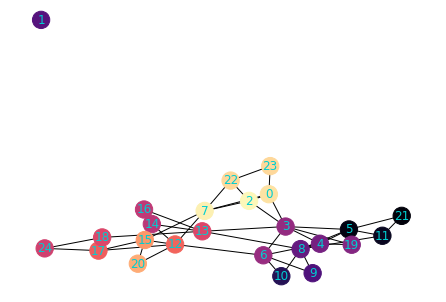

[(0, 2), (0, 3), (0, 7), (0, 23), (0, 1), (2, 3), (2, 7), (2, 22), (2, 9), (3, 4), (3, 5), (3, 6), (3, 13), (3, 19), (4, 5), (4, 6), (4, 8), (4, 19), (5, 8), (5, 11), (5, 21), (6, 9), (6, 10), (6, 12), (7, 12), (7, 15), (7, 22), (8, 9), (8, 10), (8, 11), (8, 13), (11, 21), (12, 14), (12, 15), (12, 17), (12, 20), (13, 14), (13, 16), (13, 18), (14, 16), (15, 17), (15, 20), (17, 18), (17, 24), (18, 24), (22, 23)]
numero archi: 46


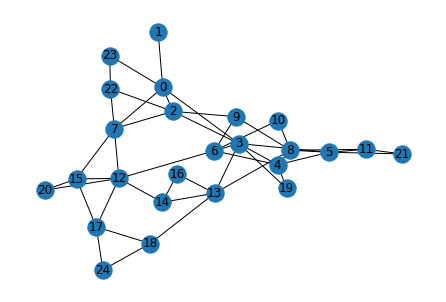

[(0, 2), (0, 3), (0, 7), (0, 23), (1, 18), (2, 3), (2, 7), (2, 22), (3, 4), (3, 5), (3, 6), (3, 13), (3, 19), (4, 5), (4, 6), (4, 8), (4, 19), (5, 8), (5, 11), (5, 21), (6, 9), (6, 10), (6, 12), (7, 12), (7, 15), (7, 22), (8, 9), (8, 10), (8, 11), (8, 13), (11, 21), (11, 23), (12, 14), (12, 15), (12, 17), (12, 20), (13, 14), (13, 16), (13, 18), (14, 16), (15, 17), (15, 20), (17, 18), (17, 24), (18, 24), (22, 23)]
numero archi: 46


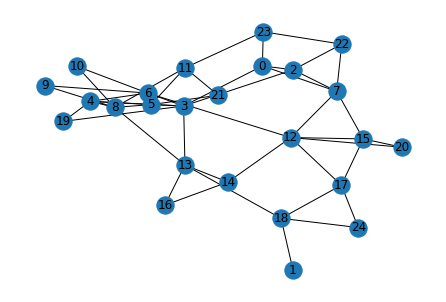

In [67]:

import copy
G = create_graph(25, [1], 2, [0.5], 2, 1, 0.75)
print(G.edges)
print("numero archi: " + str(len(G.edges)))
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
G_fake1 = None
# before launching the BFS for the selected sub-strategy, we look for all the disconnected components 
# of the graph to connect them. Note that the resulting graph will only be used on the all posting nodes but only in current epoch.
number_components = nx.number_connected_components(G)
# the components are reconnected only if there are at least 2
if number_components > 1:
    components = nx.connected_components(G)
    G_fake1 = nx.Graph()
    G_fake1.add_nodes_from(next(components))
    G_fake1.add_edges_from(G.edges(G_fake1.nodes))
    # note that for starts from second component because of next(components)
    for nodes_component in components:
        node_source = np.random.choice(list(G_fake1.nodes), size=1, replace=False)
        node_target = np.random.choice(list(nodes_component), size=1, replace=False)
        G_fake1.add_nodes_from(nodes_component)
        G_fake1.add_edges_from(G.edges(nodes_component))
        G_fake1.add_edge(node_source[0], node_target[0])
    """
    G_fake = copy.deepcopy(G)
    old_nodes_found = []
    components = nx.connected_components(G)
    for nodes_component in components:
        if old_nodes_found:
            node_source = np.random.choice(old_nodes_found, size=1, replace=False)
            node_target = np.random.choice(list(nodes_component), size=1, replace=False)
            G_fake.add_edge(node_source[0], node_target[0])
        old_nodes_found += list(nodes_component)
    """
# The total number of arches added, in the end, will be equal to 5% of the total number of arches
number_edges_to_insert = (5 * G.number_of_edges() // 100) - (number_components - 1)

if number_edges_to_insert > 0:
    non_edges_list = list(nx.non_edges(G))
    if G_fake1 is None:
        G_fake1 = copy.deepcopy(G)
    if number_edges_to_insert < len(non_edges_list):
        chosen_nonedges_keys = set(np.random.choice(len(non_edges_list), size=number_edges_to_insert, replace=False))
        chosen_nonedge = [non_edges_list[index] for index in chosen_nonedges_keys]
        G_fake1.add_edges_from(chosen_nonedge)
    else:
        G_fake1.add_edges_from(non_edges_list)

"""
for _ in range(number_edges_to_insert):
    # This condition happens if the number of components is equal to 1 and only at the first iteration
    if G_fake is None:
        G_fake = copy.deepcopy(G)
    chosen_nonedge  = random.choice(list(nx.non_edges(G_fake)))
    G_fake.add_edge(chosen_nonedge[0], chosen_nonedge[1])
"""
print(G_fake1.edges)
print("numero archi: " + str(len(G_fake1.edges)))
nx.draw(G_fake1, with_labels = True)
plt.show()



G_fake2 = None
# before launching the BFS for the selected sub-strategy, we look for all the disconnected components 
# of the graph to connect them. Note that the resulting graph will only be used on the all posting nodes but only in current epoch.
number_components = nx.number_connected_components(G)
# the components are reconnected only if there are at least 2
if number_components > 1:
    G_fake2 = copy.deepcopy(G)
    old_nodes_found = []
    components = nx.connected_components(G)
    for nodes_component in components:
        if old_nodes_found:
            node_source = np.random.choice(old_nodes_found, size=1, replace=False)
            node_target = np.random.choice(list(nodes_component), size=1, replace=False)
            G_fake2.add_edge(node_source[0], node_target[0])
        old_nodes_found += list(nodes_component)
# The total number of arches added, in the end, will be equal to 5% of the total number of arches
number_edges_to_insert = (5 * G.number_of_edges() // 100) - (number_components - 1)

for _ in range(number_edges_to_insert):
    # This condition happens if the number of components is equal to 1 and only at the first iteration
    if G_fake2 is None:
        G_fake2 = copy.deepcopy(G)
    chosen_nonedge  = random.choice(list(nx.non_edges(G_fake2)))
    G_fake2.add_edge(chosen_nonedge[0], chosen_nonedge[1])

print(G_fake2.edges)
print("numero archi: " + str(len(G_fake2.edges)))
nx.draw(G_fake2, with_labels = True)
plt.show()



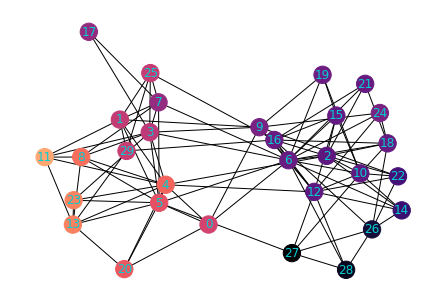

[7, 11, 25, 29, 10, 14, 15, 16, 18, 21, 22, 8, 17, 23, 1, 3, 13, 27, 24, 28, 2, 12, 19, 26]
(1, 2, 3, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29)
ci siamo


In [18]:
from collections import deque
G = create_graph(30, [1], 4, [0.5], 2, 1, 0.75)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
node_id = 0
all_neighbors = {
        node: set(nx.neighbors(G, node))
        for node in G.nodes()
    }
neigs = all_neighbors[node_id]
# BFS 
visited, queue = [[] for _ in range(4)], []
visited[0].append(node_id)
queue.append((node_id, 0))
while queue:
    # next pair (node, distance)
    next = queue.pop(0)
    # reached max distance
    if next[1] == 3:
        break
    next_neigs = list(nx.neighbors(G, next[0]))
    for neig in next_neigs:
        if neig not in visited[next[1] + 1]:
            visited[next[1] + 1].append(neig)
            queue.append((neig, next[1] + 1))
# BFS ending
hop3 = [x for x in visited[3] if x not in neigs and x != node_id]
print(hop3)

###########################

# BFS 
visited2, queue2 = [set() for _ in range(4)], deque()
visited2[0].add(node_id)
queue2.append((node_id, 0))
while queue2:
    # next pair (node, distance)
    next2 = queue2.popleft()
    # reached max distance
    if next2[1] == 3:
        break
    to_add2 = all_neighbors[next2[0]] - visited2[next2[1] + 1]
    for neig in to_add2:
        visited2[next2[1] + 1].add(neig)
        queue2.append((neig, next2[1] + 1))
        
# BFS ending
hop32 = tuple(x for x in visited2[3] if x not in neigs and x != node_id)
print(hop32)
if hop3.sort() == list(hop32).sort():
    print('ci siamo')
else:
    print('non ci siamo')

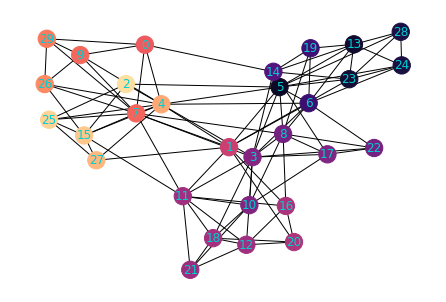

{1: 2, 2: 2, 3: 2, 5: 2, 6: 2, 15: 2, 25: 2, 26: 2, 27: 2, 8: 2, 11: 2, 13: 2, 17: 2, 19: 2, 23: 2, 16: 3, 20: 3, 10: 3, 12: 3, 18: 3, 22: 3, 24: 3, 28: 3, 21: 3}
{1: 2, 2: 2, 3: 2, 5: 2, 6: 2, 15: 2, 25: 2, 26: 2, 27: 2, 8: 2, 11: 2, 17: 2, 19: 2, 13: 2, 23: 2, 16: 3, 20: 3, 10: 3, 18: 3, 12: 3, 22: 3, 24: 3, 28: 3, 21: 3}
ci siamo


In [29]:
from collections import deque
G = create_graph(30, [1], 4, [0.5], 2, 1, 0.75)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
#print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()
node_id = 0
all_neighbors = {
        node: set(nx.neighbors(G, node))
        for node in G.nodes()
    }
neigs = all_neighbors[node_id]
# BFS
visited, queue = [], []
visited.append(node_id)
queue.append(node_id)
dist = {}
dist[node_id] = 0
while queue:
    next = queue.pop(0)
    next_neigs = list(nx.neighbors(G, next))
    for neig in next_neigs:
        if neig not in visited:
            visited.append(neig)
            queue.append(neig)
            dist[neig] = dist[next] + 1

dist_not_friends = { key:value for (key,value) in dist.items() if key not in neigs and key != node_id}

# BFS
visited2, queue2 = set(), deque()
visited2.add(node_id)
queue2.append(node_id)
dist2 = {}
dist2[node_id] = 0
while queue2:
    next2 = queue2.popleft()
    to_add2 = all_neighbors[next2] - visited2
    for neig in to_add2:
        visited2.add(neig)
        queue2.append(neig)
        dist2[neig] = dist2[next2] + 1

dist_not_friends2 = { key:value for (key,value) in dist2.items() if key not in neigs and key != node_id}

print(dist_not_friends)
print(dist_not_friends2)
if dist_not_friends == dist_not_friends2:
    print('ci siamo')
else:
    print('non ci siamo')

In [ ]:
import numpy
from scipy import special
from typing import List
def softmax_with_temperature(logits: List[float], temperature: float = 0.05) -> numpy.ndarray:
    logits_array = numpy.array(logits)
    logits_temp = logits_array / temperature

    distribution = special.softmax(logits_temp)
    return distribution

In [58]:
import numpy
from typing import List
from scipy import special
def softmax_with_temperature(logits: List[float], temperature: float = 0.05) -> numpy.ndarray:
    logits_array = numpy.array(logits)
    logits_temp = logits_array / temperature

    distribution = special.softmax(logits_temp)
    return distribution

diz={0:0.3, 1:0.5, 2:0.6}
my_list = [i for i in diz.values()]
key_list = [i for i in diz.keys()]
print(my_list)
distr = special.softmax(my_list)
print(distr)
print(np.random.choice(key_list, size=1, replace=False, p= distr))

distr2 = softmax_with_temperature(my_list, temperature=0.1)
print(distr2)


[0.3, 0.5, 0.6]
[0.28001309 0.34200877 0.37797814]
[2]
[9.35719815e-14 4.53978687e-05 9.99954602e-01]
